In [1]:
library("readr")
library("ggpubr")
library("corrplot")
library("FactoMineR")
library("vcd")
library("moments")
library("ggplot2")
library("FactoMineR")
library("factoextra")
library("tidyverse")
library("ClustOfVar")
library("ClusterR")
library("cluster")
library("RColorBrewer")
library("scales")
library("ggdendro")

Loading required package: ggplot2
corrplot 0.88 loaded
Loading required package: grid
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
-- Attaching packages ------------------------------------------------------------------------------------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v purrr   0.3.2     v forcats 0.4.0
-- Conflicts ---------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: gtools

Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor



In [2]:
df = read_csv("../data/users.db.csv")
head(df)

Parsed with column specification:
cols(
  userid = col_double(),
  date.crea = col_date(format = ""),
  score = col_double(),
  n.matches = col_double(),
  n.updates.photo = col_double(),
  n.photos = col_double(),
  last.connex = col_date(format = ""),
  last.up.photo = col_date(format = ""),
  last.pr.update = col_logical(),
  gender = col_double(),
  sent.ana = col_double(),
  length.prof = col_double(),
  voyage = col_double(),
  laugh = col_double(),
  photo.keke = col_double(),
  photo.beach = col_double()
)


userid,date.crea,score,n.matches,n.updates.photo,n.photos,last.connex,last.up.photo,last.pr.update,gender,sent.ana,length.prof,voyage,laugh,photo.keke,photo.beach
1,2011-09-17,1.495834,11,5,6,2011-10-07,2011-10-02,NA,1,6.490446,0.00000,0,0,0,0
2,2017-01-17,8.946863,56,2,6,2017-01-31,2017-02-03,NA,1,4.589125,20.72286,0,0,0,1
3,2019-05-14,2.496199,13,3,4,2019-06-17,2019-06-19,NA,1,6.473182,31.39928,0,0,0,1
4,2015-11-27,2.823579,32,5,2,2016-01-15,2015-12-09,NA,0,5.368982,0.00000,0,0,0,1
5,2014-11-28,2.117433,21,1,4,2015-01-15,2015-01-02,NA,0,5.573949,38.51022,0,1,0,0
6,2017-06-05,1.700014,14,2,6,2017-07-03,2017-06-25,NA,1,5.464667,23.11221,0,0,0,0


In [3]:
colnames(df)

[1] "userid"          "date.crea"       "score"           "n.matches"      
 [5] "n.updates.photo" "n.photos"        "last.connex"     "last.up.photo"  
 [9] "last.pr.update"  "gender"          "sent.ana"        "length.prof"    
[13] "voyage"          "laugh"           "photo.keke"      "photo.beach"

In [4]:
df_cont <- df[c('score', 'n.matches', 'n.updates.photo', 'n.photos')]

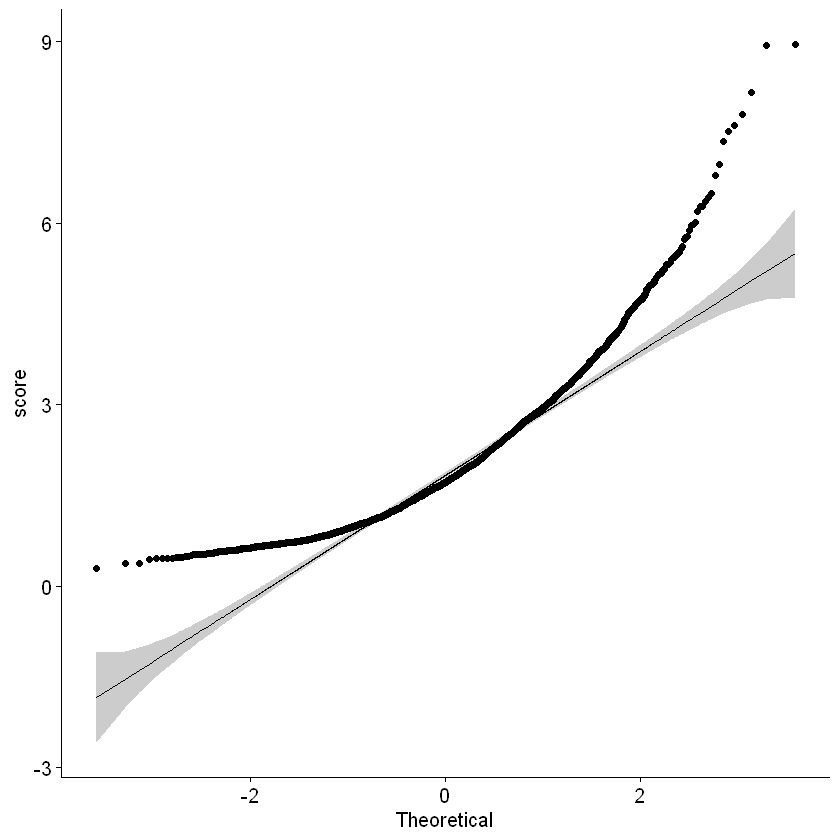

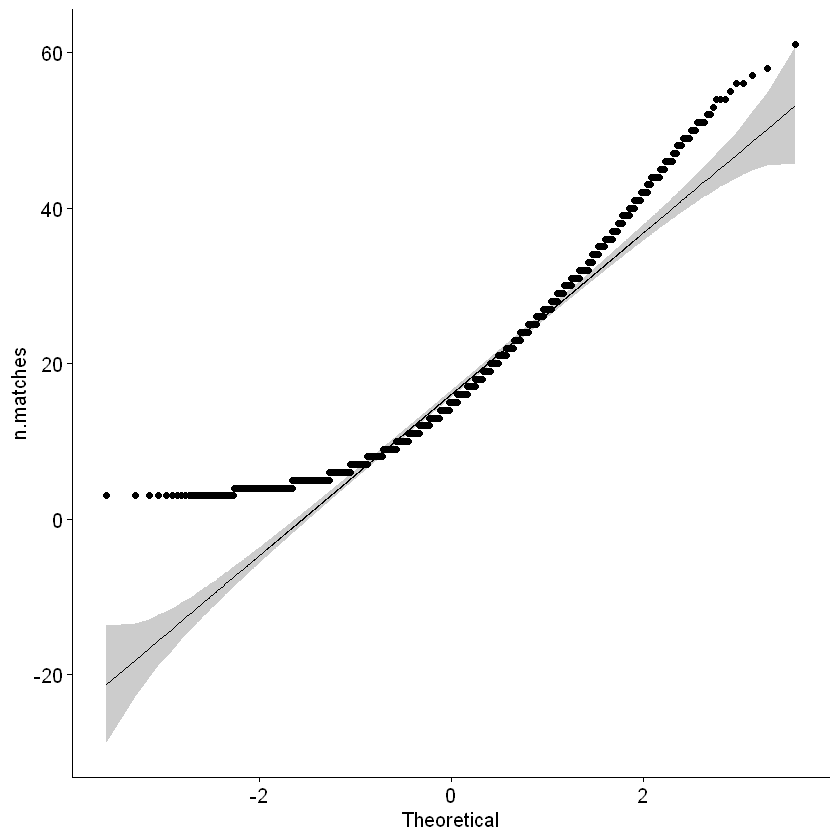

In [5]:
# mpg
ggqqplot(df$score, ylab = "score")
# wt
ggqqplot(df$n.matches, ylab = "n.matches")

In [6]:
res <- cor.test(df$score, df$n.matches, method = "spearman")
res

Warning message in cor.test.default(df$score, df$n.matches, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  df$score and df$n.matches
S = 338158884, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9248536 


In [7]:
df$gender[df$gender == 0] <- "Male"
df$gender[df$gender == 1] <- "Female"
df$gender[df$gender == 2] <- "Other"

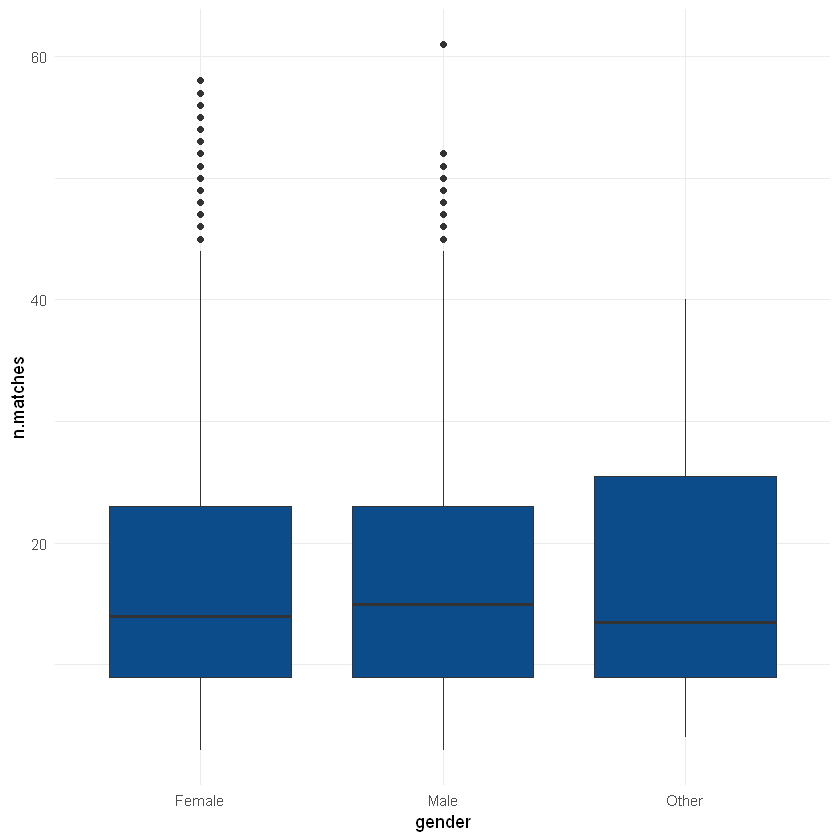

In [8]:
ggplot(df) +
  aes(x = gender, y = n.matches) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

In [9]:
shapiro.test(subset(df, gender == "Male")$n.matches)


	Shapiro-Wilk normality test

data:  subset(df, gender == "Male")$n.matches
W = 0.93526, p-value < 2.2e-16


In [10]:
shapiro.test(subset(df, gender == "Female")$n.matches)


	Shapiro-Wilk normality test

data:  subset(df, gender == "Female")$n.matches
W = 0.91965, p-value < 2.2e-16


In [11]:
test <- wilcox.test(subset(df, gender != "Other")$n.matches ~ subset(df, gender != "Other")$gender)
test


	Wilcoxon rank sum test with continuity correction

data:  subset(df, gender != "Other")$n.matches by subset(df, gender != "Other")$gender
W = 1061836, p-value = 0.3993
alternative hypothesis: true location shift is not equal to 0


In [12]:
lm(n.matches ~ score, df)


Call:
lm(formula = n.matches ~ score, data = df)

Coefficients:
(Intercept)        score  
     0.3014       8.4352  


In [13]:
lm(n.matches ~ gender, df)


Call:
lm(formula = n.matches ~ gender, data = df)

Coefficients:
(Intercept)   genderMale  genderOther  
   16.70084      0.15394      0.05778  


In [14]:
skewness(df$score, na.rm = TRUE)

[1] 1.430198

In [15]:
df$score_log <- log10(df$score)
df$n.matches_log <- log10(df$n.matches)
df$n.photos_log <- log10(df$n.photos)

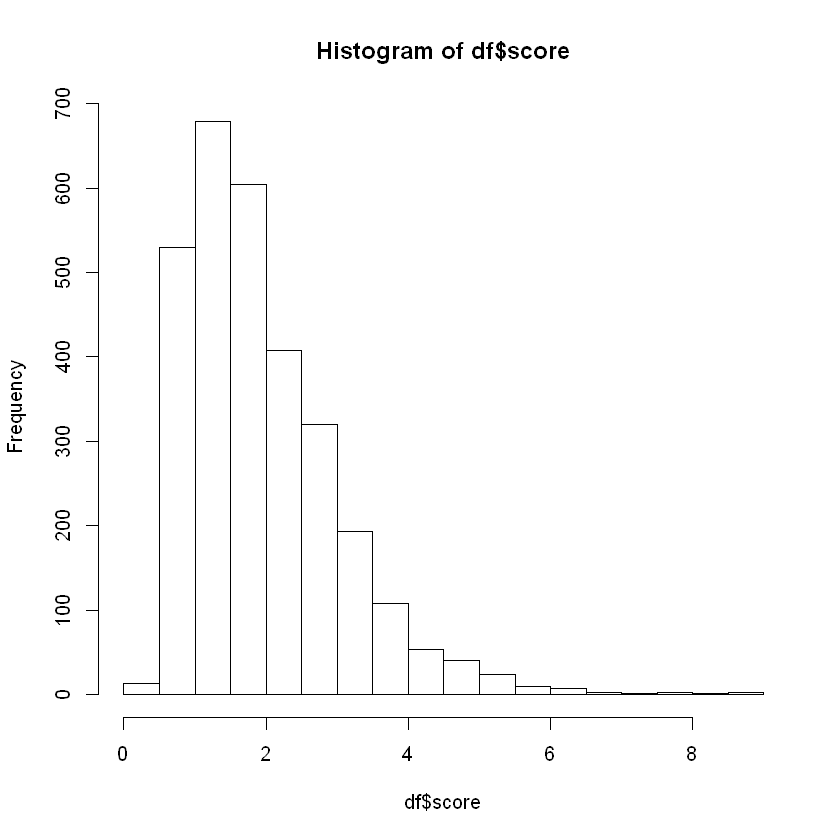

In [16]:
hist(df$score)

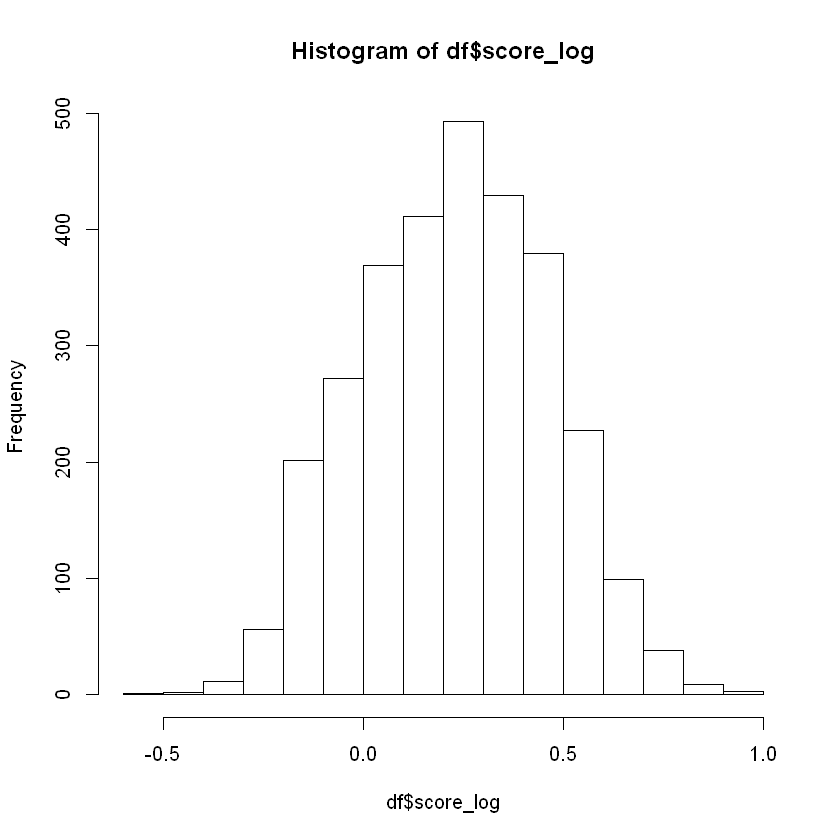

In [17]:
hist(df$score_log)

In [18]:
lm(score_log ~ gender+n.matches_log+n.photos_log, df)


Call:
lm(formula = score_log ~ gender + n.matches_log + n.photos_log, 
    data = df)

Coefficients:
  (Intercept)     genderMale    genderOther  n.matches_log   n.photos_log  
    -0.608137      -0.082629      -0.019904       0.767180       0.006908  


In [19]:
lm(score_log ~ gender+n.matches_log+n.photos_log+gender*photo.keke+gender*photo.beach, df)


Call:
lm(formula = score_log ~ gender + n.matches_log + n.photos_log + 
    gender * photo.keke + gender * photo.beach, data = df)

Coefficients:
            (Intercept)               genderMale              genderOther  
              -0.651616                 0.001231                 0.022979  
          n.matches_log             n.photos_log               photo.keke  
               0.771261                 0.001909                -0.019166  
            photo.beach    genderMale:photo.keke   genderOther:photo.keke  
               0.178552                -0.136739                 0.023357  
 genderMale:photo.beach  genderOther:photo.beach  
              -0.275534                -0.188158  


In [20]:
lm(score_log ~ gender*photo.keke+gender*photo.beach, df)


Call:
lm(formula = score_log ~ gender * photo.keke + gender * photo.beach, 
    data = df)

Coefficients:
            (Intercept)               genderMale              genderOther  
               0.229136                 0.004068                 0.038024  
             photo.keke              photo.beach    genderMale:photo.keke  
              -0.011413                 0.167943                -0.137434  
 genderOther:photo.keke   genderMale:photo.beach  genderOther:photo.beach  
               0.103481                -0.270049                -0.261643  


In [21]:
anova(lm(score_log ~ gender*photo.keke, df))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
gender,2,4.474602,2.23730084,44.24834,1.152708e-19
photo.keke,1,3.860215,3.86021462,76.34561,3.891114e-18
gender:photo.keke,2,1.627671,0.81383545,16.09568,1.114420e-07
Residuals,2994,151.383722,0.05056237,NA,NA


In [22]:
summary(lm(score_log ~ gender*photo.keke, df))


Call:
lm(formula = score_log ~ gender * photo.keke, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60659 -0.17135  0.00359  0.16978  0.68068 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.270990   0.006285  43.117  < 2e-16 ***
genderMale             -0.048548   0.009063  -5.357 9.11e-08 ***
genderOther            -0.026813   0.031520  -0.851    0.395    
photo.keke             -0.018370   0.019179  -0.958    0.338    
genderMale:photo.keke  -0.127643   0.023822  -5.358 9.04e-08 ***
genderOther:photo.keke  0.114682   0.106931   1.072    0.284    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2249 on 2994 degrees of freedom
Multiple R-squared:  0.06175,	Adjusted R-squared:  0.06018 
F-statistic: 39.41 on 5 and 2994 DF,  p-value: < 2.2e-16


In [23]:
df$photo.keke <- as.factor(df$photo.keke)

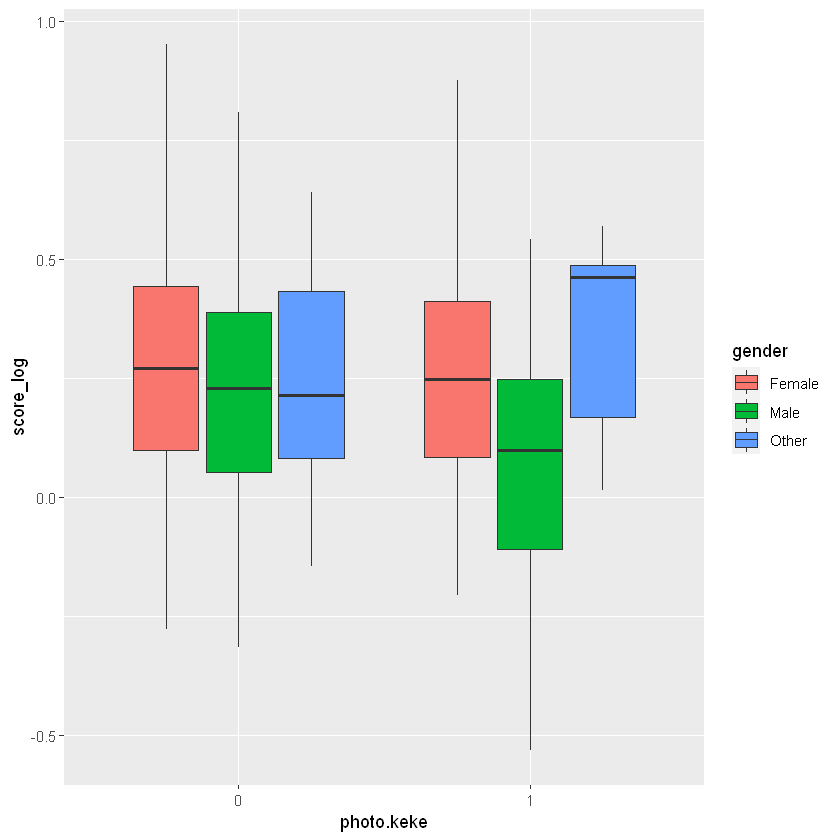

In [24]:
ggplot(df, aes(x=photo.keke, y=score_log, fill=gender)) + geom_boxplot()

In [25]:
# corr_var(df, score_log, method = "spearman", plot = TRUE, top = 10)

In [26]:
mod_1 <- lm(score_log ~ gender+n.matches_log+n.photos_log+gender*photo.keke+gender*photo.beach, df)
anova(mod_1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
gender,2,4.474602e+00,2.237301e+00,1534.670662,0.000000e+00
n.matches_log,1,1.367597e+02,1.367597e+02,93809.934281,0.000000e+00
n.photos_log,1,6.921526e-03,6.921526e-03,4.747803,2.941359e-02
photo.keke,1,4.549367e+00,4.549367e+00,3120.626103,0.000000e+00
photo.beach,1,2.805846e+00,2.805846e+00,1924.662672,0.000000e+00
gender:photo.keke,2,1.514002e+00,7.570011e-01,519.262957,2.777639e-194
gender:photo.beach,2,6.878330e+00,3.439165e+00,2359.086162,0.000000e+00
Residuals,2989,4.357477e+00,1.457838e-03,NA,NA


In [27]:
summary(mod_1)


Call:
lm(formula = score_log ~ gender + n.matches_log + n.photos_log + 
    gender * photo.keke + gender * photo.beach, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.119270 -0.028499  0.008988  0.023775  0.124663 

Coefficients:
                         Estimate Std. Error  t value Pr(>|t|)    
(Intercept)             -0.651616   0.003584 -181.824  < 2e-16 ***
genderMale               0.001231   0.001735    0.710 0.477909    
genderOther              0.022979   0.006119    3.755 0.000177 ***
n.matches_log            0.771261   0.002506  307.733  < 2e-16 ***
n.photos_log             0.001909   0.003172    0.602 0.547415    
photo.keke1             -0.019166   0.003258   -5.882  4.5e-09 ***
photo.beach              0.178552   0.002347   76.093  < 2e-16 ***
genderMale:photo.keke1  -0.136739   0.004048  -33.779  < 2e-16 ***
genderOther:photo.keke1  0.023357   0.018173    1.285 0.198801    
genderMale:photo.beach  -0.275534   0.004039  -68.220  < 2e-16 ***
ge

In [28]:
summary(lm(score_log ~ gender+photo.keke+gender:photo.keke, df))


Call:
lm(formula = score_log ~ gender + photo.keke + gender:photo.keke, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60659 -0.17135  0.00359  0.16978  0.68068 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.270990   0.006285  43.117  < 2e-16 ***
genderMale              -0.048548   0.009063  -5.357 9.11e-08 ***
genderOther             -0.026813   0.031520  -0.851    0.395    
photo.keke1             -0.018370   0.019179  -0.958    0.338    
genderMale:photo.keke1  -0.127643   0.023822  -5.358 9.04e-08 ***
genderOther:photo.keke1  0.114682   0.106931   1.072    0.284    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2249 on 2994 degrees of freedom
Multiple R-squared:  0.06175,	Adjusted R-squared:  0.06018 
F-statistic: 39.41 on 5 and 2994 DF,  p-value: < 2.2e-16


## PCA

In [29]:
colnames(df)

[1] "userid"          "date.crea"       "score"           "n.matches"      
 [5] "n.updates.photo" "n.photos"        "last.connex"     "last.up.photo"  
 [9] "last.pr.update"  "gender"          "sent.ana"        "length.prof"    
[13] "voyage"          "laugh"           "photo.keke"      "photo.beach"    
[17] "score_log"       "n.matches_log"   "n.photos_log"

In [30]:
cont_df <- df[c('score', 'score_log', 'n.matches', 'n.updates.photo', 'n.photos', 'sent.ana', 'length.prof')]
# cols <- unlist(lapply(df, is.<numeric))
# cont_df <- df[, cols]
head(cont_df)

score,score_log,n.matches,n.updates.photo,n.photos,sent.ana,length.prof
1.495834,0.1748834,11,5,6,6.490446,0.00000
8.946863,0.9516708,56,2,6,4.589125,20.72286
2.496199,0.3972793,13,3,4,6.473182,31.39928
2.823579,0.4508000,32,5,2,5.368982,0.00000
2.117433,0.3258096,21,1,4,5.573949,38.51022
1.700014,0.2304526,14,2,6,5.464667,23.11221


In [31]:
results <- prcomp(cont_df, scale = TRUE)
results$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
score,0.53191399,-0.05981388,0.046265887,-0.07288421,0.2423494,0.295946091,0.748144264
score_log,0.53126396,-0.05923331,0.041761002,-0.03338005,0.2333011,0.479452086,-0.653519764
n.matches,0.52891243,0.01308196,0.009993998,-0.06575461,0.1665249,-0.821977360,-0.110813538
n.updates.photo,0.24418765,0.06647992,-0.154677673,0.89591953,-0.3290645,0.013975612,0.029615721
n.photos,0.01607191,-0.73750887,0.624649818,0.07035009,-0.2416298,-0.047703560,-0.005023340
sent.ana,0.30724643,0.22660163,-0.009410928,-0.40707989,-0.8271063,0.065861455,0.002470454
length.prof,-0.02813308,0.62694128,0.762767633,0.12615476,0.0912881,0.009281706,0.002002602


In [32]:
results$x <- -1*results$x
head(results$x)

PC1,PC2,PC3,PC4,PC5,PC6,PC7
-0.07099475,1.40395830,0.2070684,-1.49327900,1.8800390,-0.22372010,0.05050701
-7.10266062,1.45687764,-1.6081774,0.65724206,-2.7825212,-0.13690147,-2.37265399
-0.78217320,-0.50888936,-0.8637521,-0.38288346,0.4981963,-0.85043506,0.03466737
-2.26566329,-0.09503862,1.5396844,-1.26614519,-0.0228448,0.47289288,0.12781163
-0.39620049,-0.66295233,-1.3916272,0.58232595,-0.2796677,0.09297676,0.22231619
0.20396414,0.74217247,-1.2379110,-0.06917428,0.5720430,-0.10634366,0.15469684


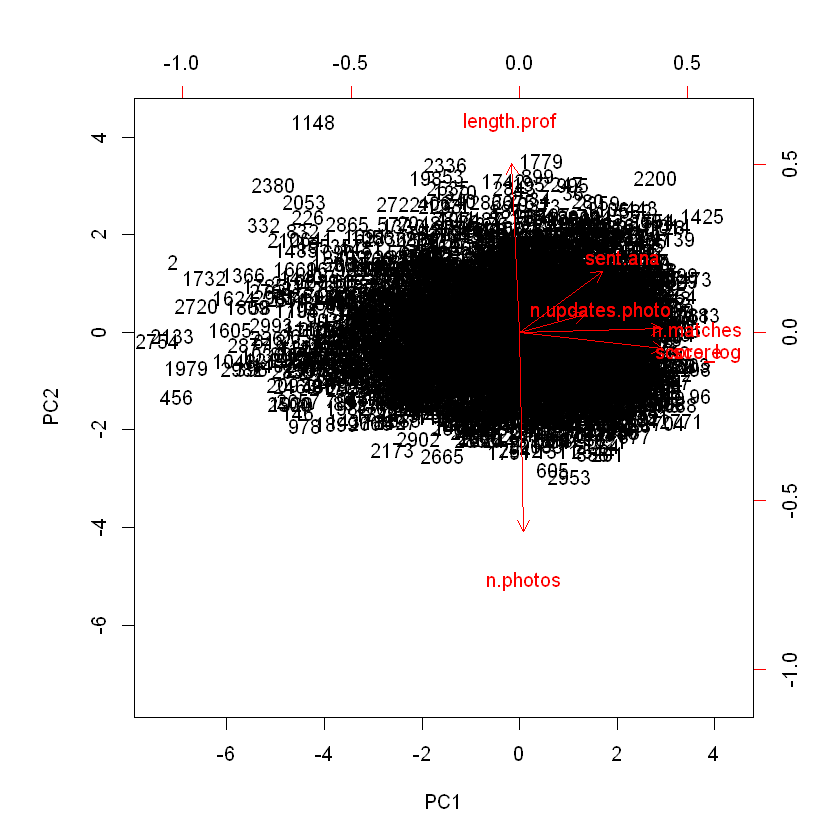

In [33]:
biplot(results, scale = 0)

In [34]:
cont_df.pca <- prcomp(cont_df, center = TRUE,scale. = TRUE)
summary(cont_df.pca)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     1.7902 1.0286 0.9825 0.9354 0.8528 0.34105 0.23098
Proportion of Variance 0.4578 0.1512 0.1379 0.1250 0.1039 0.01662 0.00762
Cumulative Proportion  0.4578 0.6090 0.7469 0.8719 0.9758 0.99238 1.00000

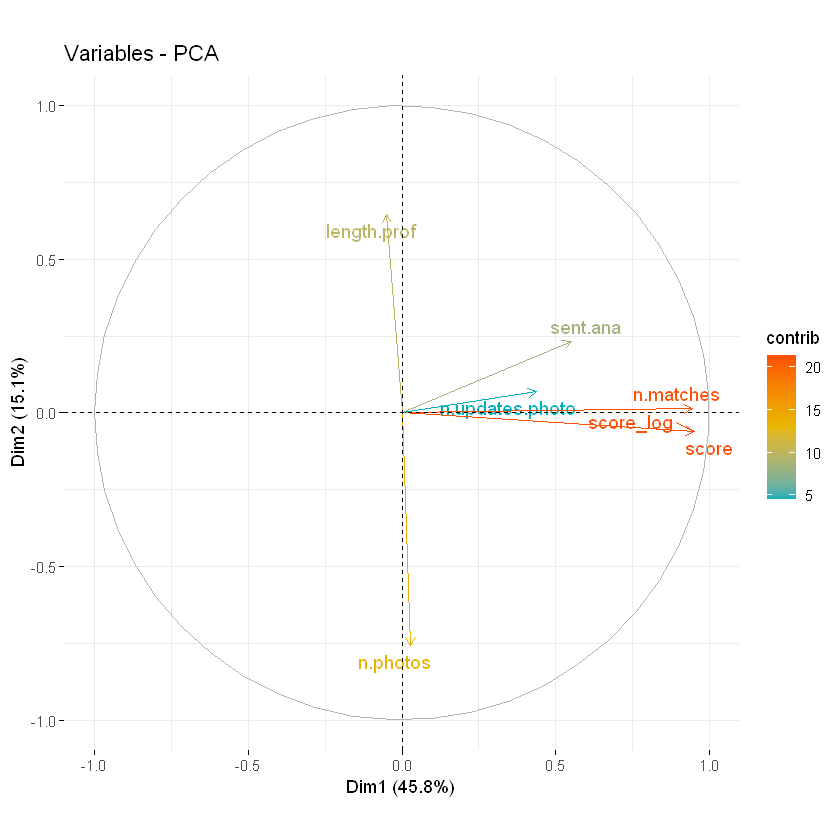

In [35]:
fviz_pca_var(cont_df.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE)

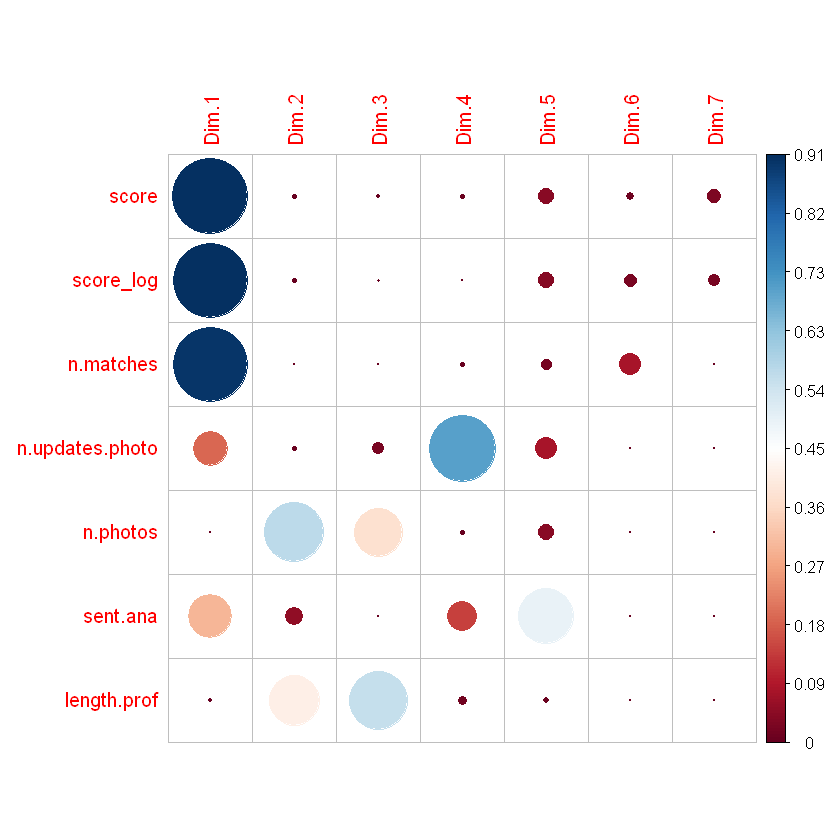

In [36]:
var <- get_pca_var(cont_df.pca)
corrplot(var$cos2, is.corr = FALSE)

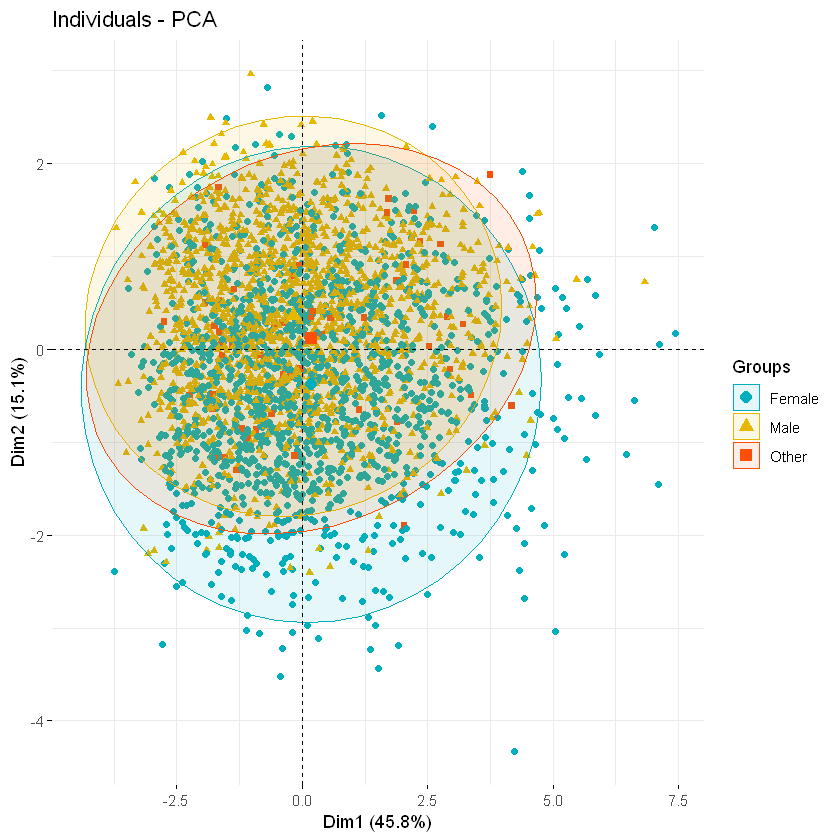

In [37]:
fviz_pca_ind(cont_df.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = df$gender, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups")

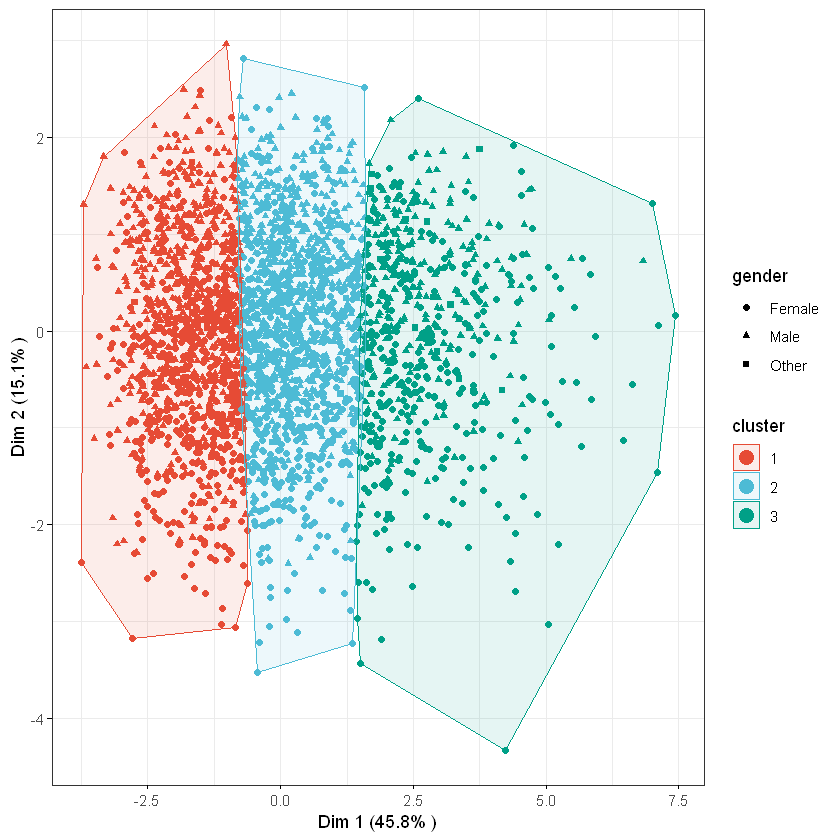

In [38]:
ind.coord <- as.data.frame(get_pca_ind(cont_df.pca)$coord)
km.res <- kmeans(as.data.frame(get_pca_ind(cont_df.pca)$coord), 3)
ind.coord$cluster <- factor(km.res$cluster)
ind.coord$gender <- df$gender


eigenvalue <- round(get_eigenvalue(cont_df.pca), 1)
variance.percent <- eigenvalue$variance.percent

ggscatter(
  ind.coord, x = "Dim.1", y = "Dim.2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "gender", size = 1.5,  legend = "right", ggtheme = theme_bw(),
  xlab = paste0("Dim 1 (", variance.percent[1], "% )" ),
  ylab = paste0("Dim 2 (", variance.percent[2], "% )" )
) +
  stat_mean(aes(color = cluster), size = 4)

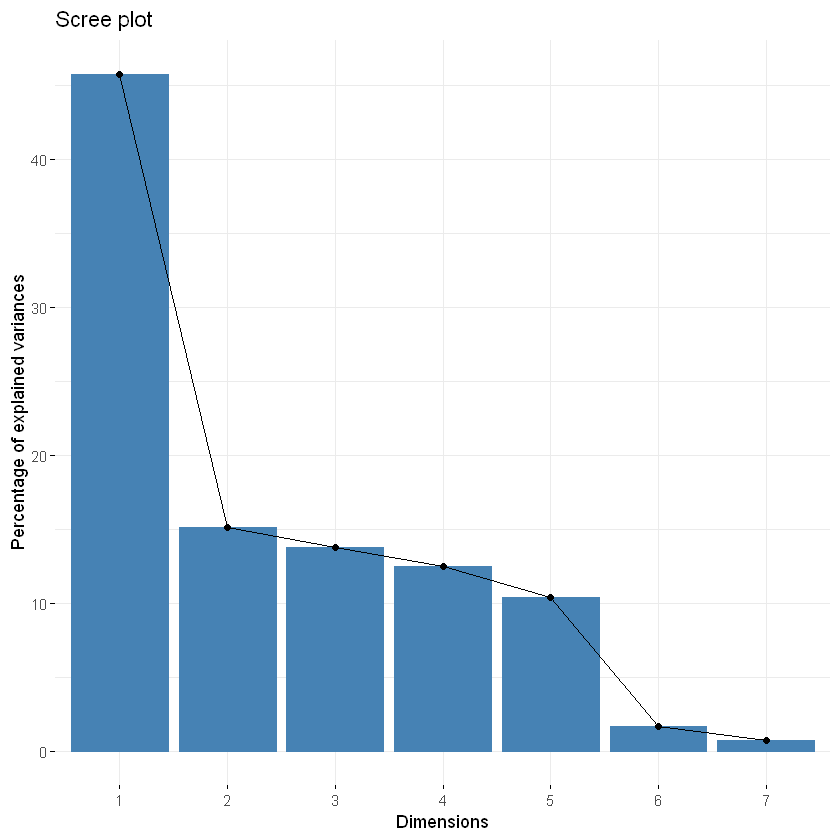

In [39]:
fviz_eig(cont_df.pca)

### MCA

In [40]:
discrete_df <- df[c('gender', 'voyage', 'laugh', 'photo.keke', 'photo.beach')]

discrete_df$gender <- as.factor(discrete_df$gender)
discrete_df$voyage <- as.factor(discrete_df$voyage)
discrete_df$laugh <- as.factor(discrete_df$laugh)
discrete_df$photo.keke <- as.factor(discrete_df$photo.keke)
discrete_df$photo.beach <- as.factor(discrete_df$photo.beach)

head(discrete_df)
dim(discrete_df)

gender,voyage,laugh,photo.keke,photo.beach
Female,0,0,0,0
Female,0,0,0,1
Female,0,0,0,1
Male,0,0,0,1
Male,0,1,0,0
Female,0,0,0,0


[1] 3000    5

In [41]:
discrete_df.mca <- MCA(discrete_df, graph = FALSE)
print(discrete_df.mca)

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 3000 individuals, described by 5 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$ind"            "results for the individuals"     
8  "$ind$coord"      "coord. for the individuals"      
9  "$ind$cos2"       "cos2 for the individuals"        
10 "$ind$contrib"    "contributions of the individuals"
11 "$call"           "intermediate results"            
12 "$call$marge.col" "weights of columns"              
13 "$call$marge.li"  "weights of rows"                 


In [42]:
eig.val <- get_eigenvalue(discrete_df.mca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,0.2556924,21.30770,21.30770
Dim.2,0.2040141,17.00117,38.30887
Dim.3,0.1988266,16.56888,54.87775
Dim.4,0.1967857,16.39880,71.27655
Dim.5,0.1880749,15.67291,86.94946
Dim.6,0.1566064,13.05054,100.00000


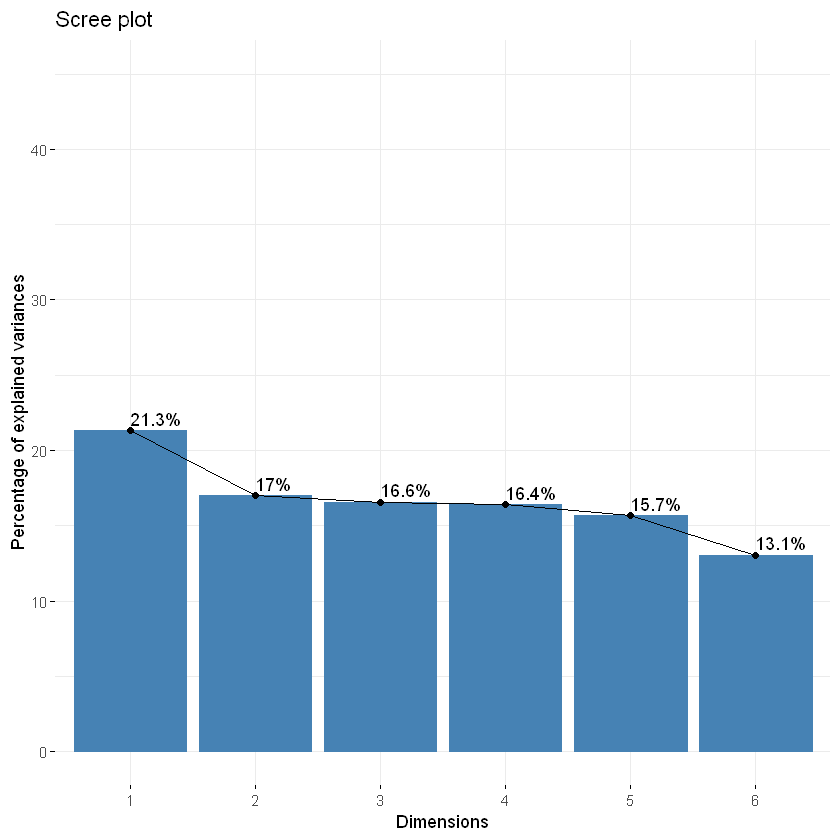

In [43]:
fviz_screeplot(discrete_df.mca, addlabels = TRUE, ylim = c(0, 45))

Warning message:
"ggrepel: 2990 unlabeled data points (too many overlaps). Consider increasing max.overlaps"

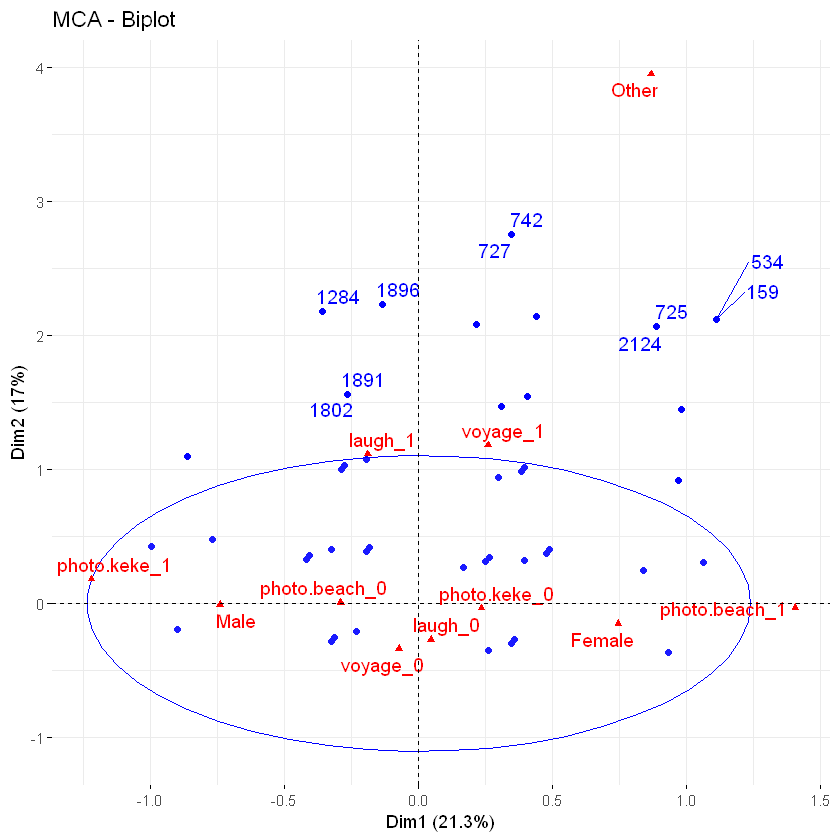

In [44]:
fviz_mca_biplot(discrete_df.mca, 
               repel = TRUE, # Avoid text overlapping (slow if many point)
               addEllipses = TRUE,
            ggtheme = theme_minimal())

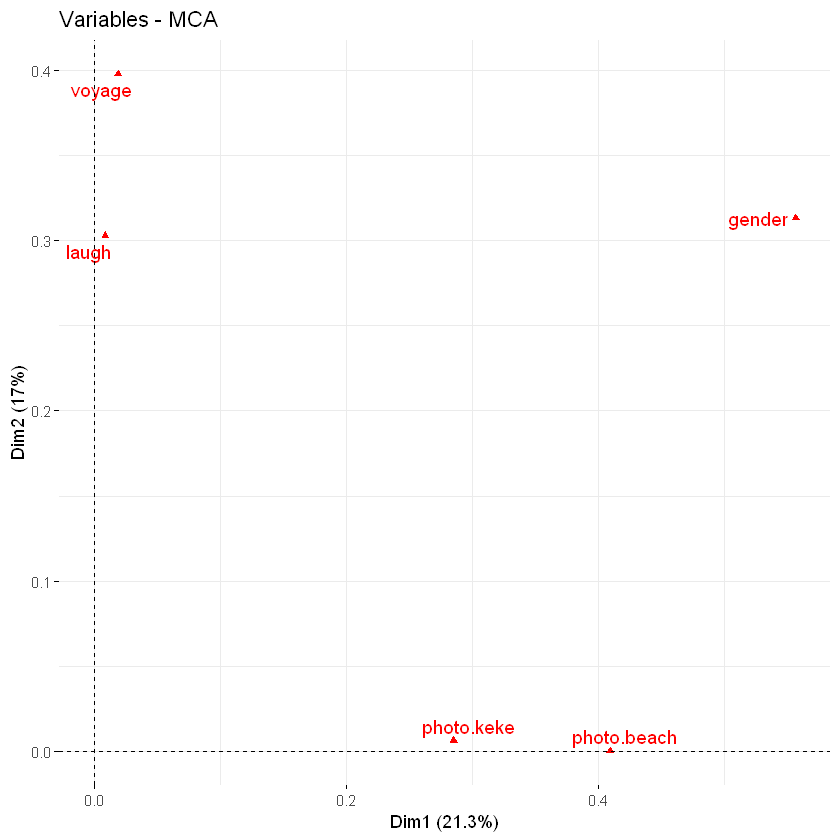

In [45]:
fviz_mca_var(discrete_df.mca, choice = "mca.cor", 
            repel = TRUE, # Avoid text overlapping (slow)
            ggtheme = theme_minimal())

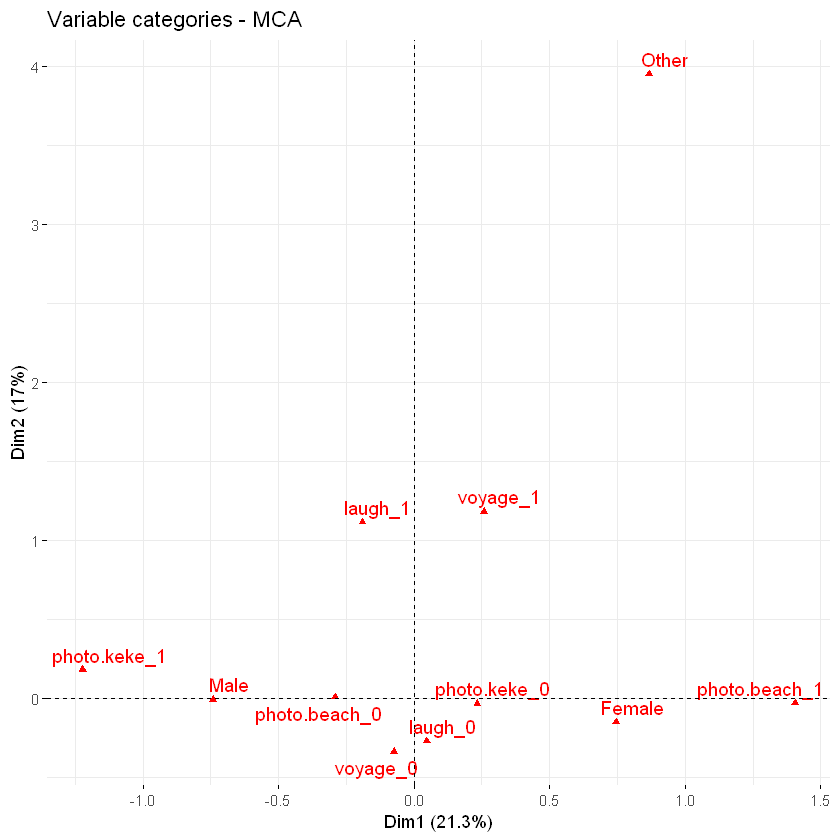

In [46]:
fviz_mca_var(discrete_df.mca, 
             repel = TRUE, # Avoid text overlapping (slow)
             ggtheme = theme_minimal())

In [47]:
# run variable clustering excluding the target variable (churn) 
variable_tree <- hclustvar(X.quali = cont_df)
#plot the dendrogram of variable groups
plot(variable_tree)

ERROR: Error: There are columns in X.quali where all the categories are identical


In [ ]:
km.res <- kmeans(cont_df, 3)

In [ ]:
summary(cont_df.pca)

In [ ]:
fviz_cluster(km.res, data = cont_df,
             palette = c("#2E9FDF", "#00AFBB", "#E7B800"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
             )


In [ ]:
# Dimension reduction using PCA
res.pca <- prcomp(cont_df,  scale = TRUE)
# Coordinates of individuals
ind.coord <- as.data.frame(get_pca_ind(res.pca)$coord)
# Add clusters obtained using the K-means algorithm
ind.coord$cluster <- factor(km.res$cluster)
# Add Species groups from the original data sett
ind.coord$gender <- df$gender
# Data inspection
head(ind.coord)

In [ ]:
# Percentage of variance explained by dimensions
eigenvalue <- round(get_eigenvalue(res.pca), 1)
variance.percent <- eigenvalue$variance.percent
head(eigenvalue)

In [ ]:
ggscatter(
  ind.coord, x = "Dim.1", y = "Dim.2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "gender", size = 1.5,  legend = "right", ggtheme = theme_bw(),
  xlab = paste0("Dim 1 (", variance.percent[1], "% )" ),
  ylab = paste0("Dim 2 (", variance.percent[2], "% )" )
) +
  stat_mean(aes(color = cluster), size = 4)

In [ ]:
comp <- data.frame(cont_df.pca$x[, 1:4])
palette(alpha(brewer.pal(9, 'Set1'), 0.5))
plot(comp, col=km.res$cluster, pch = 16)

In [ ]:
comp <- data.frame(cont_df.pca$x[, 1:2])
palette(alpha(brewer.pal(9, 'Set1'), 0.5))
plot(comp, col=km.res$cluster, pch = 16)

In [ ]:
plot(comp, pch=16, col=rgb(0,0,0,0.5))

wss <- (nrow(cont_df)-1)*sum(apply(cont_df,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(cont_df,
                                     centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares")

In [ ]:
cont_df_sc <- as.data.frame(scale(cont_df))
d <- dist(cont_df, method = "euclidean")

In [ ]:
# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )

# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1)

In [ ]:
hc3 <- agnes(cont_df, method = "ward")
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes")

In [ ]:
dist = dist(res.pca, diag=TRUE)
hc <- hclust(res.pca)
dhc <- as.dendrogram(hc)
plot(dhc[[2]] , main= "zoom on a part of the dendrogram")

In [ ]:
mygraph <- graph_from_data_frame(cont_df)
ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
  geom_edge_diagonal() +
  geom_node_point() +
  theme_void()

http://www.sthda.com/english/wiki/beautiful-dendrogram-visualizations-in-r-5-must-known-methods-unsupervised-machine-learning

In [ ]:
dd <- dist(scale(cont_df), method = "euclidean")
hc <- hclust(dd, method = "ward.D2")

In [ ]:
# Convert hclust into a dendrogram and plot
hcd <- as.dendrogram(hc)
# Default plot
plot(hcd, type = "rectangle", ylab = "Height")

In [ ]:
plot(hcd, ylim = c(20, 100))

In [ ]:
# Define nodePar
nodePar <- list(lab.cex = 0.6, pch = c(NA, 19), 
                cex = 0.7, col = "blue")
# Customized plot; remove labels
plot(hcd, ylab = "Height", nodePar = nodePar, leaflab = "none")

In [ ]:
# Build dendrogram object from hclust results
dend <- as.dendrogram(hc)
# Extract the data (for rectangular lines)
# Type can be "rectangle" or "triangle"
dend_data <- dendro_data(dend, type = "rectangle")
# What contains dend_data
names(dend_data)

In [ ]:
# Plot line segments and add labels
p <- ggplot(dend_data$segments) + 
  geom_segment(aes(x = x, y = y, xend = xend, yend = yend))+
  geom_text(data = dend_data$labels, aes(x, y, label = label),
            hjust = 1, angle = 90, size = 3)+
  ylim(5, 100)
print(p)

In [ ]:
res.pca <- PCA(cont_df, graph = FALSE)
hcpc <- HCPC(res.pca, min = 3, max = NULL, nb.clust = -1)
plot(hc)

In [ ]:
plot(hcpc, choice="map")

In [ ]:
plot(hcpc, choice="tree")

In [ ]:
plot(hcpc, choice="bar")

In [ ]:
fviz_dend(hcpc, show_labels = FALSE)